## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [2]:
%pylab inline
data_dir = "./Data/Weather"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [101]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  1349k      0  0:00:59  0:00:59 --:--:-- 2812k


### Get the statistics from the Pickle File

In [3]:
import pickle
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT.pickle','r'))


In [4]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [5]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [6]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [7]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

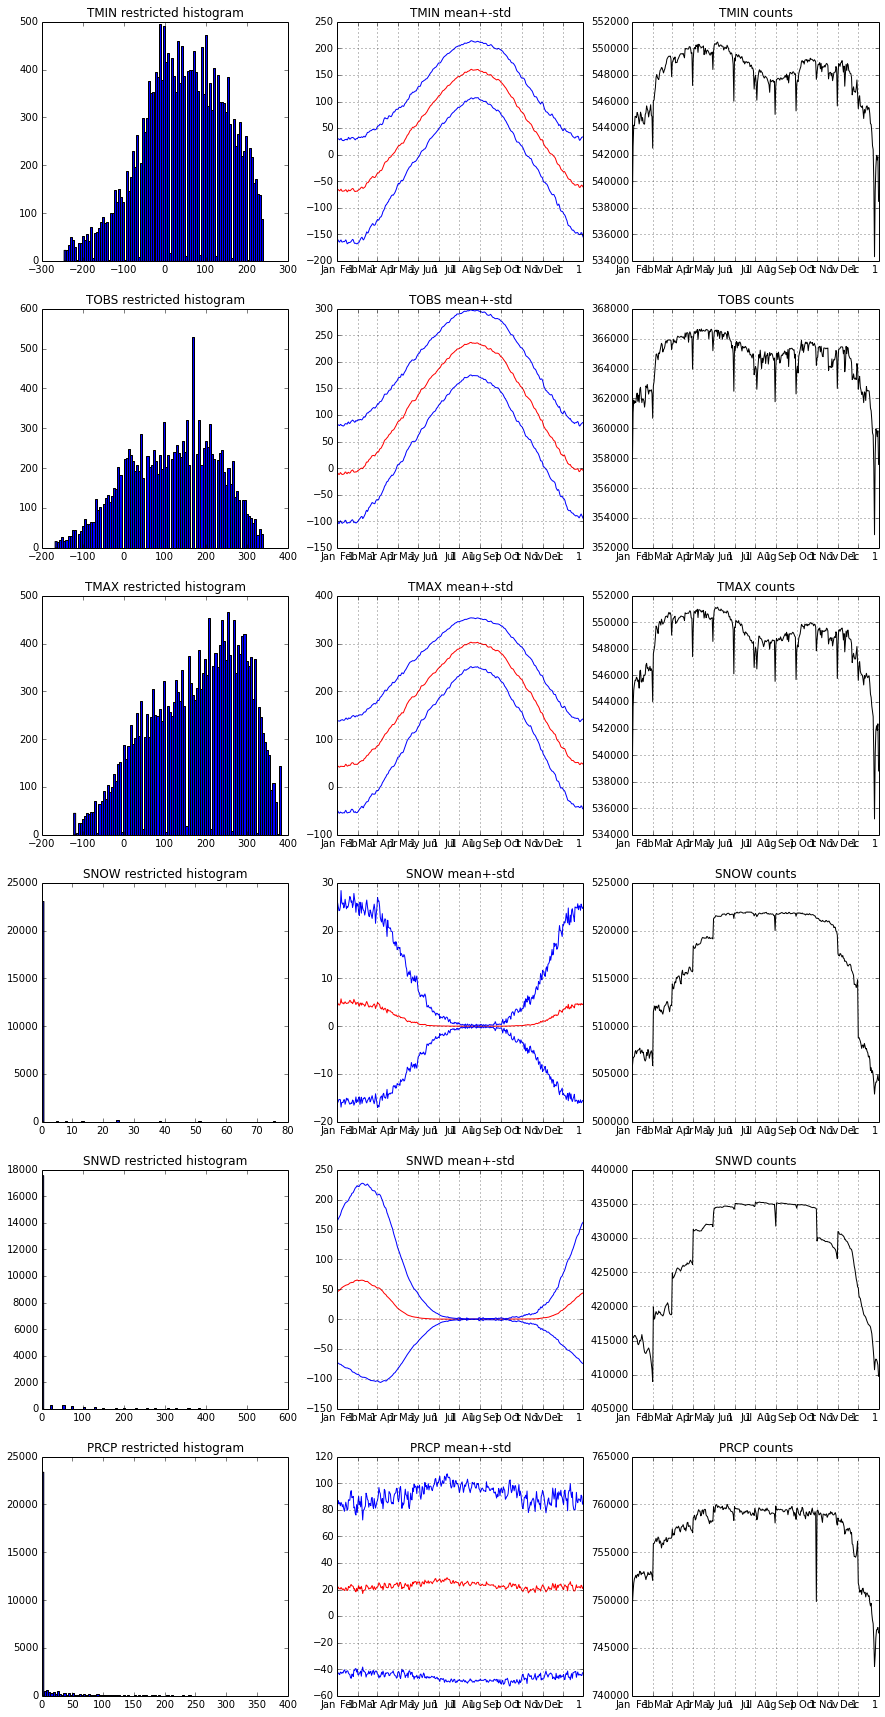

In [8]:
import matplotlib.pyplot as plt
import numpy as np

figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    lowValue = STAT[meas]['low100']
    highValue = STAT[meas]['high100']
    values = STAT[meas]['SortedVals']
    restrictedValues = filter(lambda x: x>=lowValue and x<=highValue,values)
    hist(restrictedValues,bins=100)
    title(meas+' restricted histogram')
    
    subplot(6,3,offset)
    offset+=1
    
    ## Your code for mean and mean +- std
    mean = STAT[meas]['Mean']
    mean_std_1 = mean + np.sqrt(STAT[meas]['Var'])
    mean_std_2 = mean - np.sqrt(STAT[meas]['Var'])
    YearlyPlots(mean,c='red')
    YearlyPlots(mean_std_1,c='blue')
    YearlyPlots(mean_std_2,c='blue')
    title(meas+' mean+-std')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    YearlyPlots(STAT[meas]['NE'],c='black')
    title(meas+' counts')
    

### Plot the Number of measurements recorded each day for TMAX

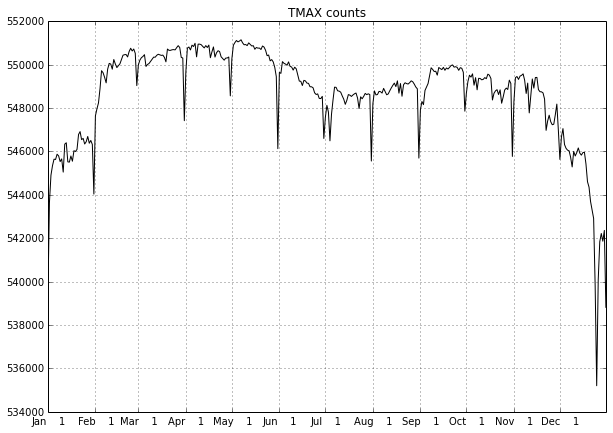

In [9]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'],c='black')
title('TMAX counts')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


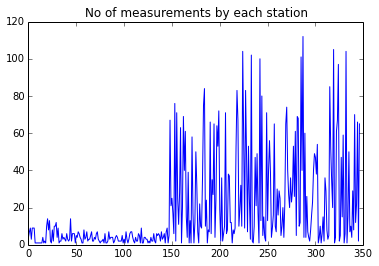

In [10]:
#Q1: The count is lower at the beginning of the year and months. The reason could be that the stations stop recording
#the data

Data=pickle.load(open('../../Data/Weather/SampleStations.pickle','r'))
FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)

import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df    
    

df1 = m_df['SNWD'].groupby(["station"]).count()
a = df1.iloc[:,:1].values
plot(a)
title("No of measurements by each station")

# We can see that every station records takes different counts of measurements. So some station become inactive during
# a period of time.
# We can plot yearly data for such inactive stations Eg. USC00454397, US10daws014 (Got station id manually by looking 
# the count of the number of measurements)
# So it is restricted to a subset of stations


** Instructor ** it is not clear what this figure represents and how the conclusion you make in the comment is supported by the figure.

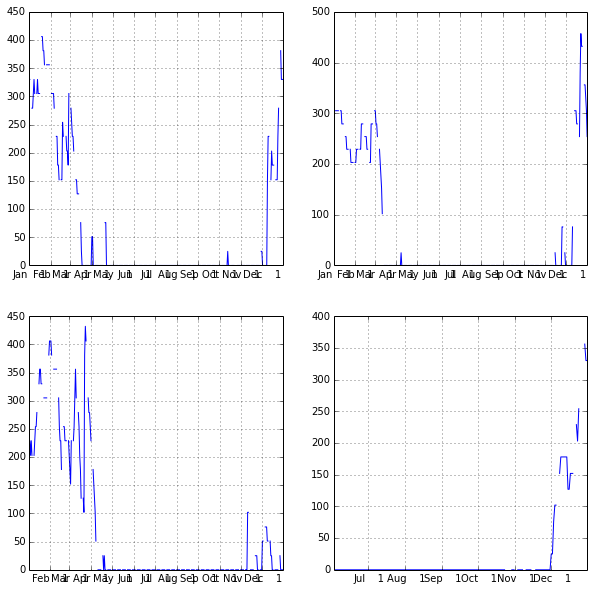

In [17]:


figure(figsize=(10,10))
df1 = m_df['SNWD']
b = df1.loc[df1['station'] == 'USC00474530']
title("Measurements of Tmax for a particular station USC00474530")
for i in range(0,4):
    c = b.iloc[i,-365:].values
    subplot(2,2,i)
    YearlyPlots(c)


##We can see that the some SNWD values are missing/low towards the end of year/winter season. The data has not been
#processed properly or the station became inactive

##Solution: Keep only those stations which have a certain number of measurements taken

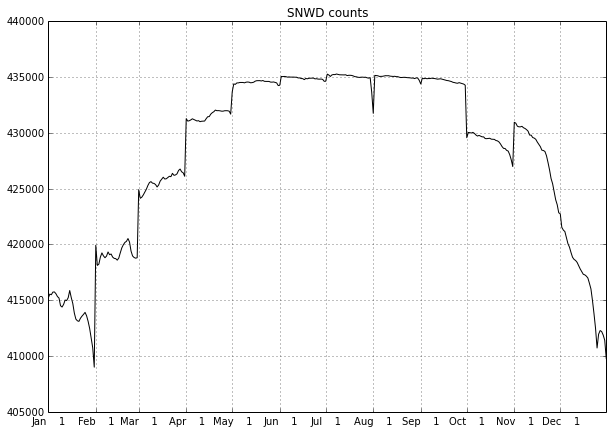

In [18]:
#Q2 The counts per day value for SNWD is as follows:
YearlyPlots(STAT['SNWD']['NE'],c='black')
title('SNWD counts')

#We can see that the values decrease towards the end and the beginning of a year. There is a sudden dip at the beginning
#of each month as well. This can be because some stations may not be recording any data during that time like end of the
#month for some official reason.
#Also some stations in very cold harsh weather may become inactive during the winter season. And hence the counts 
#decrease during the beginning and end of the year

### Instructor comments

The explanations are not supported by the analysis / figures.

[It is not a good idea to write conclusions as comments in a code cell. It makes them harder to understand. Comments inside code cells should be used only to explain the code. Not the statistical analysis.]

No extra credit points.

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

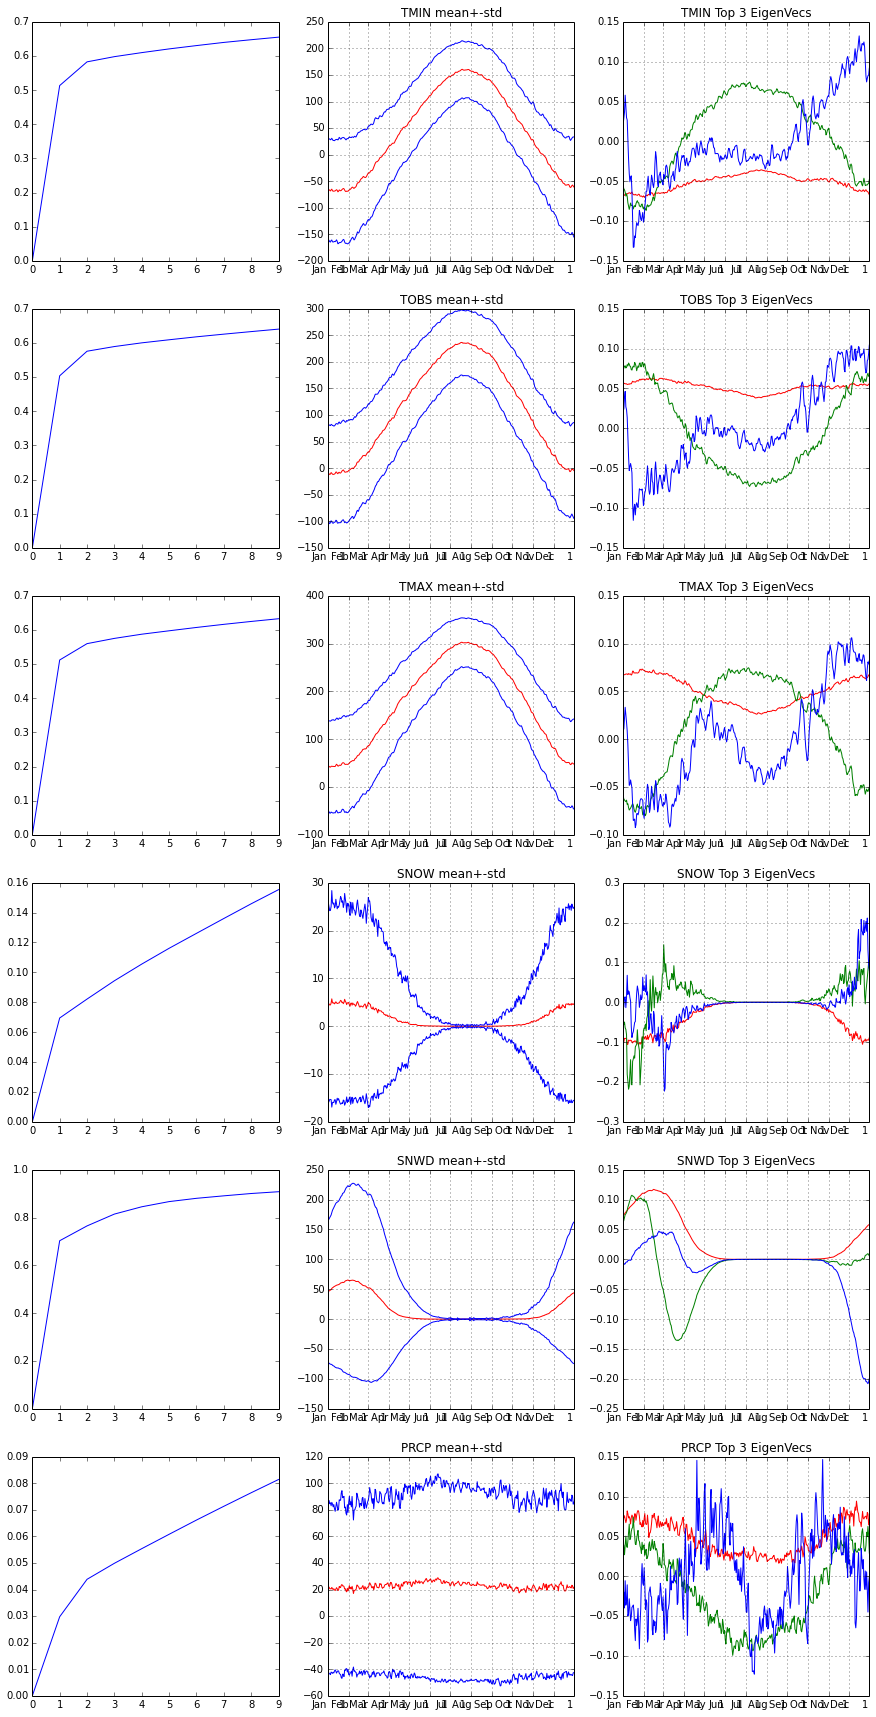

In [19]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    
    eigval = STAT[meas]['eigval']
    sumdiagonal = sum(eigval)
    percentagevariance = [0]
    for i in range(0,9):
        percentagevariance.append(percentagevariance[-1]+eigval[i]/sumdiagonal)  
    plot(percentagevariance)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    mean = STAT[meas]['Mean']
    mean_std_1 = mean + np.sqrt(STAT[meas]['Var'])
    mean_std_2 = mean - np.sqrt(STAT[meas]['Var'])
    YearlyPlots(mean,c='red')
    YearlyPlots(mean_std_1,c='blue')
    YearlyPlots(mean_std_2,c='blue')
    title(meas+' mean+-std')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    eigvec = STAT[meas]['eigvec']
    YearlyPlots(eigvec[:,0],c='red')
    YearlyPlots(eigvec[:,1],c='green')
    YearlyPlots(eigvec[:,2],c='blue')
    title(meas+' Top 3 EigenVecs')

    